In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import cufflinks as cf
import plotly.graph_objs as go
import datetime

from chart_studio import plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from pandas_datareader import data, wb
%matplotlib inline

In [170]:
init_notebook_mode(connected=True)

In [171]:
# Data Gather
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [172]:
BAC = data.DataReader('BAC', 'yahoo', start, end)
#CitiGroup
C = data.DataReader('C', 'yahoo', start, end)
#Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)
#JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)
#Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)
#Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [173]:
WFC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.353487
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.117405
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.095079
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.213118
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.209929


In [174]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [175]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [176]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.777515   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.418774   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.461834   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.411610   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.433144   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  33.464520  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  33.487461  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  33.579281  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  33.613728  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  33.969547  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.353487  
2006-01-04  31.530001  10870000.0  20.117405  
2006-01-05  31.495001  10158000.0  20.095079  
2006-01-06  31.680000   8403800.0  20.213118  
2006-01-09  31.674999   5619600.0  20.209929  

[5 rows x 36 columns]

In [177]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [178]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.777515  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.418774  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.461834  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.411610  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.433144  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  33.464520  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  33.487461  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  33.579281  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  33.613728  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  33.969547  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.353487  
2006-01-04   31.799999  31.530001  10870000.0  20.117405  
2006-01-05   31.500000  31.495001  10158000.0  20.095079  
2006-01-06   31.580000  31.680000   8403800.0  20.213118  
2006-01-09   31.674999  31.674999   5619600.0  20.209929  

[5 rows x 36 columns]

In [179]:
for tick in tickers:
    print (tick,bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [180]:
bank_stocks.xs(key='Close', axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [181]:
returns = pd.DataFrame()

In [182]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [183]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


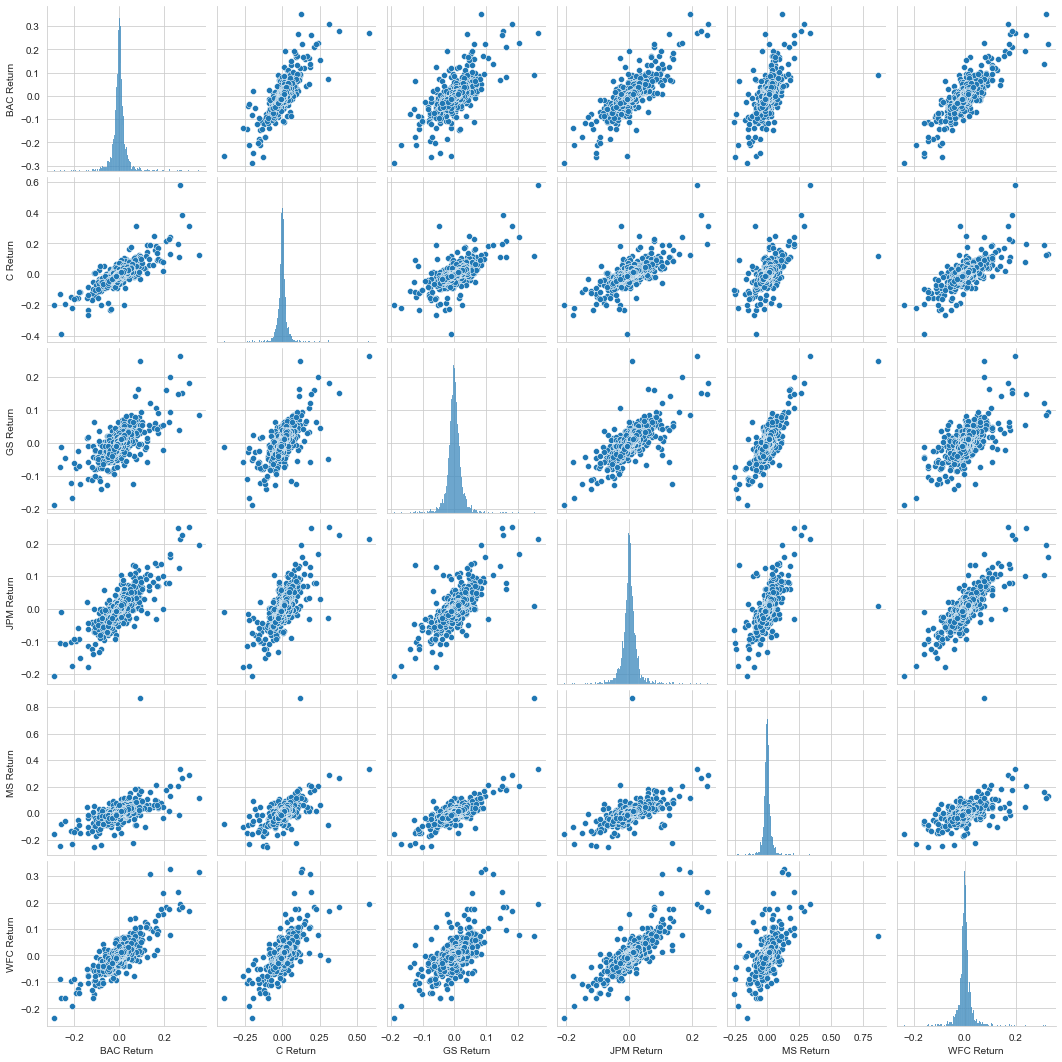

In [184]:
sns.pairplot(returns[1:])

In [185]:
# for Indevitual
returns['BAC Return'].idxmin()

Timestamp('2009-01-20 00:00:00')

In [186]:
# for all
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [187]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [188]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [189]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MS Return', ylabel='Density'>

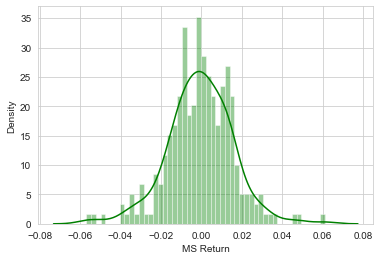

In [190]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green',
            bins=50)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='C Return', ylabel='Density'>

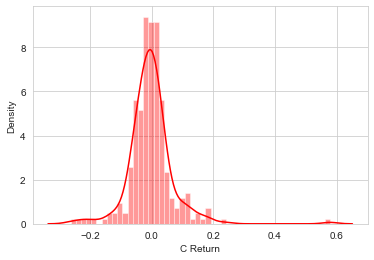

In [191]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']["C Return"], color="red", bins=50)

In [192]:
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

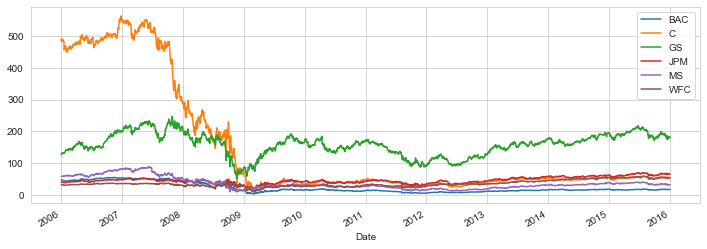

In [193]:
for tick in tickers:
    bank_stocks[tick]["Close"].plot(label=tick, figsize=(12,4))
plt.legend()

<AxesSubplot:xlabel='Date'>

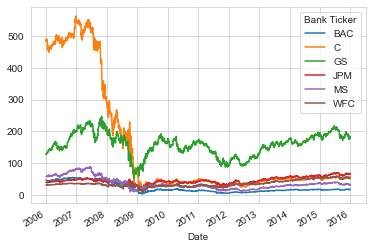

In [194]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [195]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

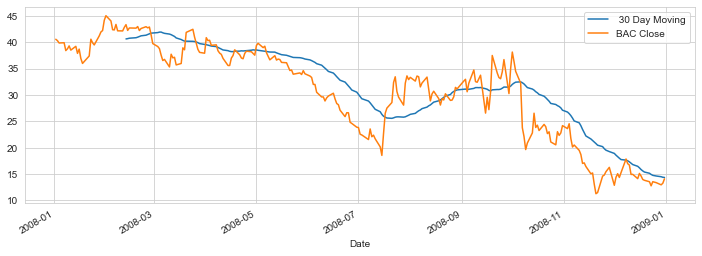

In [196]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label=" 30 Day Moving")
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

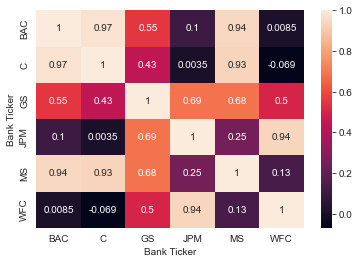

In [197]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1,level='Stock Info').corr(), annot=True)

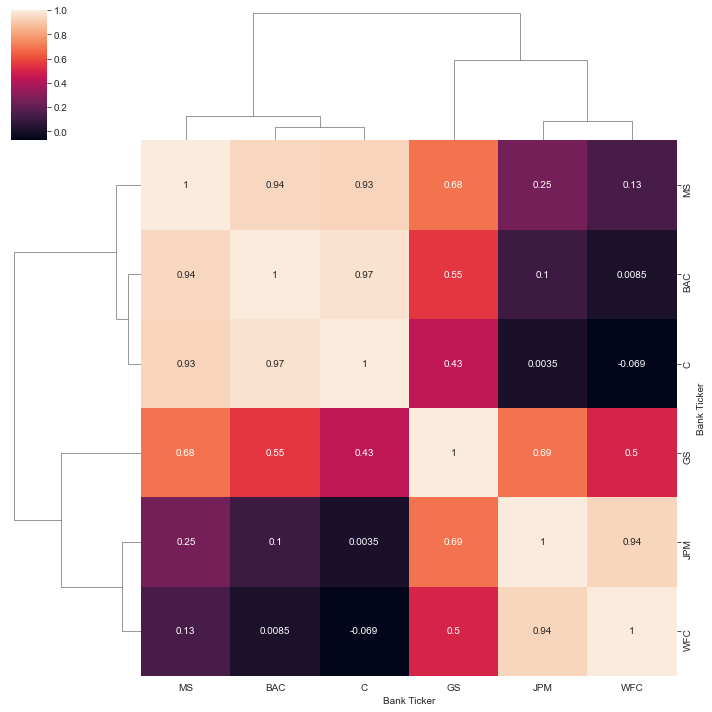

In [198]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1,level='Stock Info').corr(), annot=True)

In [199]:
Close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
Close_corr.iplot(kind='heatmap', colorscale='rdylbu')

Bank of America stock from jan 15 to jan 16

In [200]:
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

In [201]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55])

In [202]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')